# Homework 2 - IEEE Fraud Detection

## Part 0 - Setup that is required to run the code (Required to load data)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd '/content/gdrive/My Drive/Semester I/Data Science Fundamentals/Submission'

/content/gdrive/My Drive/Semester I/Data Science Fundamentals/Submission


In [0]:
import pandas as pd
TRAIN_TRANSACTION_DATA = pd.read_csv('train_transaction.csv')
TRAIN_IDENTITY_DATA = pd.read_csv('train_identity.csv')
Skiena_Columns= ['TransactionID','TransactionDT','TransactionAmt','ProductCD','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2','DeviceType','DeviceInfo','isFraud']

#JOIN with IDENTITY COLUMN

TRAIN_TRANSACTION_DATA_FINAL = pd.merge(pd.DataFrame(TRAIN_TRANSACTION_DATA),pd.DataFrame(TRAIN_IDENTITY_DATA), how='left', on = 'TransactionID')

#EXTRACTING COLUMNS IN THE ASSIGMENT

TRAIN_TRANSACTION_DATA_SKIENA=TRAIN_TRANSACTION_DATA_FINAL[Skiena_Columns]

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

## Part 1(a) - Preprocessing

In [9]:
TRAIN_TRANSACTION_DATA_SKIENA.head(5)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,DeviceType,DeviceInfo,isFraud
0,2987000,86400,68.5,W,discover,credit,NaN,NaN,315.0,87.0,19.0,NaN,NaN,NaN,0
1,2987001,86401,29.0,W,mastercard,credit,gmail.com,NaN,325.0,87.0,NaN,NaN,NaN,NaN,0
2,2987002,86469,59.0,W,visa,debit,outlook.com,NaN,330.0,87.0,287.0,NaN,NaN,NaN,0
3,2987003,86499,50.0,W,mastercard,debit,yahoo.com,NaN,476.0,87.0,NaN,NaN,NaN,NaN,0
4,2987004,86506,50.0,H,mastercard,credit,gmail.com,NaN,420.0,87.0,NaN,NaN,mobile,SAMSUNG SM-G892A Build/NRD90M,0


In [20]:
pd.Series(TRAIN_TRANSACTION_DATA_SKIENA['addr1'].unique()).sort_values().head(5)

113    100.0
239    101.0
154    102.0
277    104.0
289    105.0
dtype: float64

In [21]:
pd.Series(TRAIN_TRANSACTION_DATA_SKIENA['addr2'].unique()).sort_values().head(5)

50    10.0
9     13.0
34    14.0
14    15.0
13    16.0
dtype: float64

In [18]:
pd.Series(TRAIN_TRANSACTION_DATA_SKIENA['dist1'].unique()).sort_values().head(5)

4     0.0
19    1.0
10    2.0
5     3.0
7     4.0
dtype: float64

In [19]:
pd.Series(TRAIN_TRANSACTION_DATA_SKIENA['dist2'].unique()).sort_values().head(5)

17     0.0
31     1.0
16     2.0
126    3.0
14     4.0
dtype: float64

In [0]:
from sklearn import preprocessing
import numpy as np

# PREPROCESSING 
#P_emaildomain, R_emaildomain and DeviceInfo with LabelEncoder since they contain String fields that can be labelled.

# Moreover, fields like emaildomain can go huge and hence OneHot Encoding is not a good idea

le_p = preprocessing.LabelEncoder()
le_p.fit(np.unique(TRAIN_TRANSACTION_DATA_SKIENA['P_emaildomain'].astype(str)))

le_r = preprocessing.LabelEncoder()
le_r.fit(np.unique(TRAIN_TRANSACTION_DATA_SKIENA['R_emaildomain'].astype(str)))

le_d = preprocessing.LabelEncoder()
le_d.fit(np.unique(TRAIN_TRANSACTION_DATA_SKIENA['DeviceInfo'].astype(str)))

TRAIN_TRANSACTION_DATA_SKIENA['R_emaildomain']=pd.DataFrame(TRAIN_TRANSACTION_DATA_SKIENA['R_emaildomain'].astype(str)).apply(le_r.transform)
TRAIN_TRANSACTION_DATA_SKIENA['P_emaildomain']=pd.DataFrame(TRAIN_TRANSACTION_DATA_SKIENA['P_emaildomain'].astype(str)).apply(le_p.transform)
TRAIN_TRANSACTION_DATA_SKIENA['DeviceInfo']=pd.DataFrame(TRAIN_TRANSACTION_DATA_SKIENA['DeviceInfo'].astype(str)).apply(le_d.transform)

##Shown above, addr1 and addr2 does not contain 0 and hence 0 can be put for nan values
##Shown above, dist1 and dist2 does contain 0 and hence -1 should be put for nan values
TRAIN_TRANSACTION_DATA_SKIENA['dist2'].fillna(-1.0,inplace=True)
TRAIN_TRANSACTION_DATA_SKIENA['dist1'].fillna(-1.0,inplace=True)
TRAIN_TRANSACTION_DATA_SKIENA['addr2'].fillna(0.0,inplace=True)
TRAIN_TRANSACTION_DATA_SKIENA['addr1'].fillna(0.0,inplace=True)



## TransactionDT looks like a timestamp in seconds and hence it is wise to extract data it contains in hours and use that


Onehot_hour=pd.DataFrame(pd.to_datetime(TRAIN_TRANSACTION_DATA_SKIENA['TransactionDT'],unit='s').dt.hour)
Onehot_hour.columns=['hour']
TRAIN_TRANSACTION_DATA_SKIENA['hour']=pd.DataFrame(Onehot_hour)


## ProductCD, card4 and card6 and DeviceType contains limited set values and can strongly influence decision making which will be shown further
## Hence separate features for them using OneHot Encoding
Onehot=pd.DataFrame(pd.get_dummies(TRAIN_TRANSACTION_DATA_SKIENA['ProductCD']))
TRAIN_TRANSACTION_DATA_SKIENA=TRAIN_TRANSACTION_DATA_SKIENA.join(Onehot)
Onehot=pd.DataFrame(pd.get_dummies(TRAIN_TRANSACTION_DATA_SKIENA['card4']))
TRAIN_TRANSACTION_DATA_SKIENA=TRAIN_TRANSACTION_DATA_SKIENA.join(Onehot)
Onehot=pd.DataFrame(pd.get_dummies(TRAIN_TRANSACTION_DATA_SKIENA['card6']))
TRAIN_TRANSACTION_DATA_SKIENA=TRAIN_TRANSACTION_DATA_SKIENA.join(Onehot)
Onehot=pd.DataFrame(pd.get_dummies(TRAIN_TRANSACTION_DATA_SKIENA['DeviceType']))
TRAIN_TRANSACTION_DATA_SKIENA=TRAIN_TRANSACTION_DATA_SKIENA.join(Onehot)

TRAIN_TRANSACTION_DATA_SKIENA.drop(columns=['card4','card6','ProductCD','DeviceType','TransactionDT'],inplace=True)


## Data after preprocessing and cleaning

In [23]:
TRAIN_TRANSACTION_DATA_SKIENA.head(10)

,TransactionID,TransactionAmt,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,DeviceInfo,isFraud,hour,C,H,R,S,W,american express,discover,mastercard,visa,charge card,credit,debit,debit or credit,desktop,mobile
0,2987000,68.5,32,32,315.0,87.0,19.0,-1.0,1742,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
1,2987001,29.0,16,32,325.0,87.0,-1.0,-1.0,1742,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
2,2987002,59.0,36,32,330.0,87.0,287.0,-1.0,1742,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
3,2987003,50.0,54,32,476.0,87.0,-1.0,-1.0,1742,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,2987004,50.0,16,32,420.0,87.0,-1.0,-1.0,954,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
5,2987005,49.0,16,32,272.0,87.0,36.0,-1.0,1742,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
6,2987006,159.0,54,32,126.0,87.0,0.0,-1.0,1742,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
7,2987007,422.5,29,32,325.0,87.0,-1.0,-1.0,1742,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
8,2987008,15.0,1,32,337.0,87.0,-1.0,-1.0,1727,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
9,2987009,117.0,54,32,204.0,87.0,19.0,-1.0,1742,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


#### TransactionID can be skipped as that is a simple identity field and it will not influence a fraudulent nature of transaction.

#### Device Type and Fradulent nature

In [0]:
TRAIN_T_D_FRAUD = TRAIN_TRANSACTION_DATA_SKIENA['isFraud']>0.02
TRAIN_T_D_NON_FRAUD = TRAIN_TRANSACTION_DATA_SKIENA['isFraud']<=0.02
TRAIN_T_D_FRAUD_DATA = TRAIN_TRANSACTION_DATA_SKIENA[TRAIN_T_D_FRAUD]
TRAIN_T_D_NON_FRAUD_DATA = TRAIN_TRANSACTION_DATA_SKIENA[TRAIN_T_D_NON_FRAUD]
TRAIN_TRANSACTION_DATA_FRAUD_TID = TRAIN_T_D_FRAUD_DATA['TransactionID']
TRAIN_TRANSACTION_DATA_NONFRAUD_TID = TRAIN_T_D_NON_FRAUD_DATA['TransactionID']

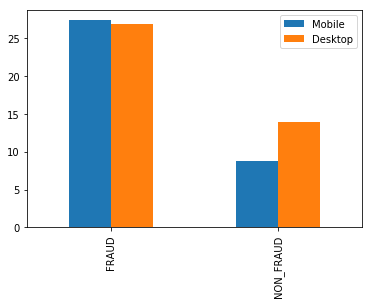

In [25]:
FRAUD_DEVICE_TYPE_MOBILE = TRAIN_T_D_FRAUD_DATA.loc[TRAIN_T_D_FRAUD_DATA['mobile']==1]
FRAUD_DEVICE_TYPE_DESKTOP = TRAIN_T_D_FRAUD_DATA.loc[TRAIN_T_D_FRAUD_DATA['desktop']==1]
NON_FRAUD_DEVICE_TYPE_MOBILE = TRAIN_T_D_NON_FRAUD_DATA.loc[TRAIN_T_D_NON_FRAUD_DATA['mobile']==1]
NON_FRAUD_DEVICE_TYPE_DESKTOP = TRAIN_T_D_NON_FRAUD_DATA.loc[TRAIN_T_D_NON_FRAUD_DATA['desktop']==1]

FRAUD_DEVICE_TYPE_COUNT_MOBILE = pd.DataFrame(FRAUD_DEVICE_TYPE_MOBILE).shape[0] 
FRAUD_DEVICE_TYPE_COUNT_DESKTOP = FRAUD_DEVICE_TYPE_DESKTOP.shape[0]
FRAUD_DEVICE_TYPE_COUNT_TOTAL = TRAIN_T_D_FRAUD_DATA.shape[0]


NON_FRAUD_DEVICE_TYPE_COUNT_MOBILE = pd.DataFrame(NON_FRAUD_DEVICE_TYPE_MOBILE).shape[0] 
NON_FRAUD_DEVICE_TYPE_COUNT_DESKTOP = NON_FRAUD_DEVICE_TYPE_DESKTOP.shape[0]
NON_FRAUD_DEVICE_TYPE_COUNT_TOTAL = TRAIN_T_D_NON_FRAUD_DATA.shape[0]

MOB = { 'NON_FRAUD':(NON_FRAUD_DEVICE_TYPE_COUNT_MOBILE*100.0/NON_FRAUD_DEVICE_TYPE_COUNT_TOTAL),'FRAUD':(FRAUD_DEVICE_TYPE_COUNT_MOBILE*100.0/FRAUD_DEVICE_TYPE_COUNT_TOTAL)}  
DESK = { 'NON_FRAUD':(NON_FRAUD_DEVICE_TYPE_COUNT_DESKTOP*100.0/NON_FRAUD_DEVICE_TYPE_COUNT_TOTAL),'FRAUD':(FRAUD_DEVICE_TYPE_COUNT_DESKTOP*100.0/FRAUD_DEVICE_TYPE_COUNT_TOTAL)}  
Q1_DEVICETYPE = pd.DataFrame({'Mobile': MOB,'Desktop': DESK})

Q1_DEVICETYPE.plot.bar()

### The above graph shows that in fraudulent transactions, Mobile and Desktop contributed equally whereas in non fraduent cases Mobile had a fairly small share which goes into proving that Mobile was used for a lot of fraudulent activities(about 28%) as compared to that of non fradulent (about 8%) and can possibly be used as a feature. 

### TransactionDT can be converted to hour and used to analyse fradulent behaviour

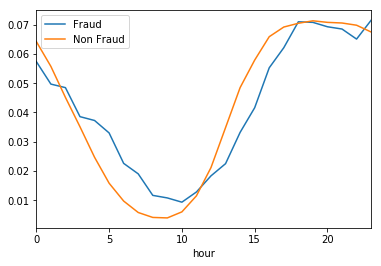

In [26]:
DT_FRAUD=pd.DataFrame(TRAIN_T_D_FRAUD_DATA.groupby('hour').size()/TRAIN_T_D_FRAUD_DATA.groupby('hour').size().sum())
DT_NON_FRAUD=pd.DataFrame(TRAIN_T_D_NON_FRAUD_DATA.groupby('hour').size()/TRAIN_T_D_NON_FRAUD_DATA.groupby('hour').size().sum())
DT_FRAUD.columns=['Fraud']
DT_FRAUD['Non Fraud'] = DT_NON_FRAUD
DT_FRAUD.plot.line()

### Figure shows that TransactionDT or 'hour of transaction' followed the same pattern. Therefore, there was nothing that the hour of transaction could tell.

In [0]:
AMT_FRAUD=pd.DataFrame(TRAIN_T_D_FRAUD_DATA['TransactionAmt'])
AMT_NON_FRAUD=pd.DataFrame(TRAIN_T_D_NON_FRAUD_DATA['TransactionAmt'])


Text(0.5, 0.98, 'Log TransactionAmt for Fraud Transactions')

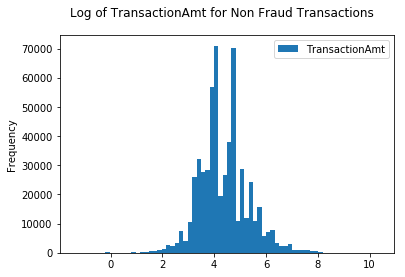

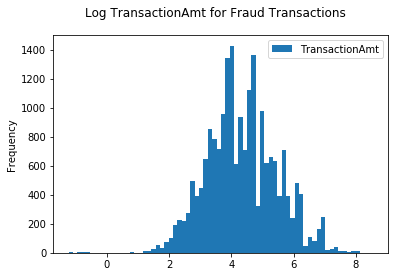

In [33]:
import pylab as pl
np.log(AMT_NON_FRAUD).plot.hist(bins=70)
pl.suptitle("Log of TransactionAmt for Non Fraud Transactions")

np.log(AMT_FRAUD).plot.hist(bins=70)
pl.suptitle("Log TransactionAmt for Fraud Transactions")

### Transaction Amt also shows a similar trend and hence is not a suitable candidate for feature.
### Note: Log is taken because transaction values are too large

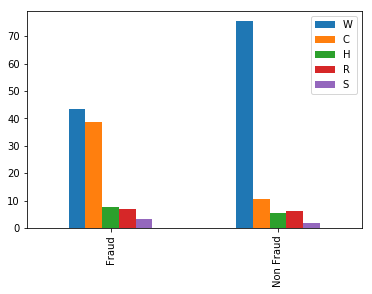

In [42]:
FRAUD_PRODUCT_CD = pd.DataFrame((TRAIN_T_D_FRAUD_DATA[['W','C','H','R','S']].sum() * 100/TRAIN_T_D_FRAUD_DATA[['W','C','H','R','S']].sum().sum()))
FRAUD_PRODUCT_CD.columns = ['Fraud']
FRAUD_PRODUCT_CD['Fraud'] = pd.DataFrame(FRAUD_PRODUCT_CD)
NON_FRAUD_PRODUCT_CD = pd.DataFrame(TRAIN_T_D_NON_FRAUD_DATA[['W','C','H','R','S']].sum() * 100 /TRAIN_T_D_NON_FRAUD_DATA[['W','C','H','R','S']].sum().sum())
FRAUD_PRODUCT_CD['Non Fraud'] = pd.DataFrame(NON_FRAUD_PRODUCT_CD)
FRAUD_PRODUCT_CD.transpose().plot.bar()


### NonFraud Transactions are dominated by W product type. 

### In case of fraudulent transactions, there is an unexpected rise in the percent of ProductType C. This can be used as feature and a purchase of Product Type C has a much higher chance of it being C when compare to other product types.


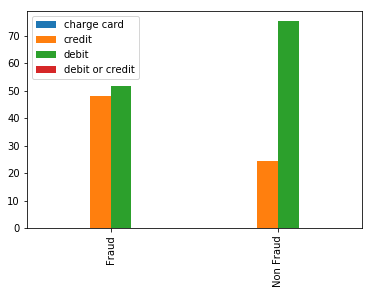

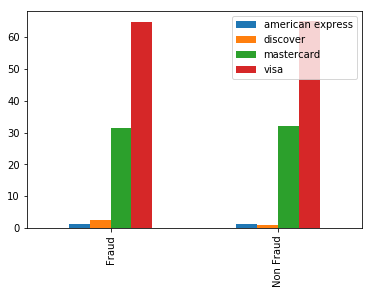

In [43]:
NON_FRAUD_CARD_4= TRAIN_T_D_NON_FRAUD_DATA[['american express', 'discover', 'mastercard', 'visa']][(TRAIN_T_D_NON_FRAUD_DATA['american express']==1) |
                                                                                 (TRAIN_T_D_NON_FRAUD_DATA['discover']==1) |
                                                                                 (TRAIN_T_D_NON_FRAUD_DATA['mastercard']==1)|
                                                                                 (TRAIN_T_D_NON_FRAUD_DATA['visa']==1)
                                                                                ].sum()*100/TRAIN_T_D_NON_FRAUD_DATA.shape[0]
NON_FRAUD_CARD_6= TRAIN_T_D_NON_FRAUD_DATA[['charge card', 'credit', 'debit', 'debit or credit']][(TRAIN_T_D_NON_FRAUD_DATA['charge card']==1) |
                                                                                 (TRAIN_T_D_NON_FRAUD_DATA['credit']==1) |
                                                                                 (TRAIN_T_D_NON_FRAUD_DATA['debit']==1)|
                                                                                 (TRAIN_T_D_NON_FRAUD_DATA['debit or credit']==1)
                                                                                ].sum()*100/TRAIN_T_D_NON_FRAUD_DATA.shape[0]
FRAUD_CARD_4= TRAIN_T_D_FRAUD_DATA[['american express', 'discover', 'mastercard', 'visa']][
                                                                                 (TRAIN_T_D_FRAUD_DATA['american express']==1) |
                                                                                 (TRAIN_T_D_FRAUD_DATA['discover']==1) |
                                                                                 (TRAIN_T_D_FRAUD_DATA['mastercard']==1)|
                                                                                 (TRAIN_T_D_FRAUD_DATA['visa']==1)
                                                                                ].sum()*100/TRAIN_T_D_FRAUD_DATA.shape[0]
FRAUD_CARD_6= TRAIN_T_D_FRAUD_DATA[['charge card', 'credit', 'debit', 'debit or credit']][
                                                                                 (TRAIN_T_D_FRAUD_DATA['charge card']==1) |
                                                                                 (TRAIN_T_D_FRAUD_DATA['credit']==1) |
                                                                                 (TRAIN_T_D_FRAUD_DATA['debit']==1)|
                                                                                 (TRAIN_T_D_FRAUD_DATA['debit or credit']==1)
                                                                                ].sum()*100/TRAIN_T_D_FRAUD_DATA.shape[0]
NON_FRAUD_CARD_6 = pd.DataFrame(NON_FRAUD_CARD_6)
FRAUD_CARD_6 = pd.DataFrame(FRAUD_CARD_6)
FRAUD_CARD_6.columns = ['Fraud']
FRAUD_CARD_6['Non Fraud']  = NON_FRAUD_CARD_6
FRAUD_CARD_6.transpose().plot.bar()


NON_FRAUD_CARD_4 = pd.DataFrame(NON_FRAUD_CARD_4)
FRAUD_CARD_4 = pd.DataFrame(FRAUD_CARD_4)
FRAUD_CARD_4.columns = ['Fraud']
FRAUD_CARD_4['Non Fraud']  = NON_FRAUD_CARD_4
FRAUD_CARD_4.transpose().plot.bar()



### The card4 column shows cardtype. "credit" card shown an unexpected rise in percent in fraudulent cases and hence can be used as feature. "debit" on the other hand, shows a decrease in percent in case of fraudulent cases making a "debit" transaction much safer that "credit"

### Company issuing the card in card6 columns reveals no fruitful info,

In [0]:
np.log(TRAIN_T_D_NON_FRAUD_DATA[TRAIN_T_D_NON_FRAUD_DATA['addr1']!=0.0].groupby('addr1').size().sort_values()).tail(100).plot.bar(figsize=(25,4))


,Fraud,Non Fraud,percent
addr1,,,
431.0,13,25,34.210526
391.0,16,19,45.714286
471.0,1,1,50.000000
501.0,2,2,50.000000
466.0,1,1,50.000000
483.0,13,10,56.521739
305.0,6,3,66.666667


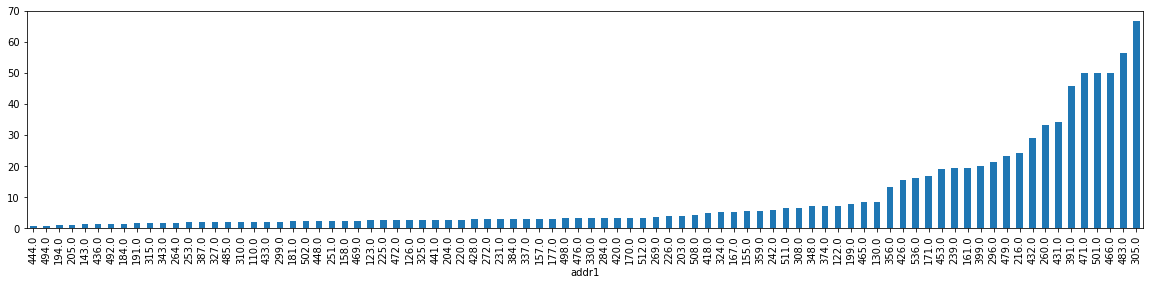

In [192]:
A=pd.DataFrame(TRAIN_T_D_FRAUD_DATA[TRAIN_T_D_FRAUD_DATA['addr1']>1.0].groupby('addr1').size())
B=pd.DataFrame(TRAIN_T_D_NON_FRAUD_DATA[TRAIN_T_D_NON_FRAUD_DATA['addr1']!=0.0].groupby('addr1').size())

A.columns=['Fraud']
A['Non Fraud']= pd.DataFrame(B)
A['percent']= A['Fraud']*100/(A['Fraud'] + A['Non Fraud'])
A['percent'].sort_values().plot.bar(figsize=(20,4))
A.sort_values(by='percent').tail(7)

### In areas with addr1 as 391, 471, 501, 466, 483, 395 there is more than 45% fraudulent traffic

In [0]:
np.log(TRAIN_T_D_NON_FRAUD_DATA[TRAIN_T_D_NON_FRAUD_DATA['addr2']!=0.0].groupby('addr2').size()).tail(100).plot.bar(figsize=(25,4))


,Fraud,Non Fraud,percent
addr2,,,
38.0,2,1.0,66.666667
10.0,8,NaN,NaN
46.0,3,NaN,NaN
51.0,4,NaN,NaN
75.0,1,NaN,NaN
82.0,1,NaN,NaN
92.0,2,NaN,NaN


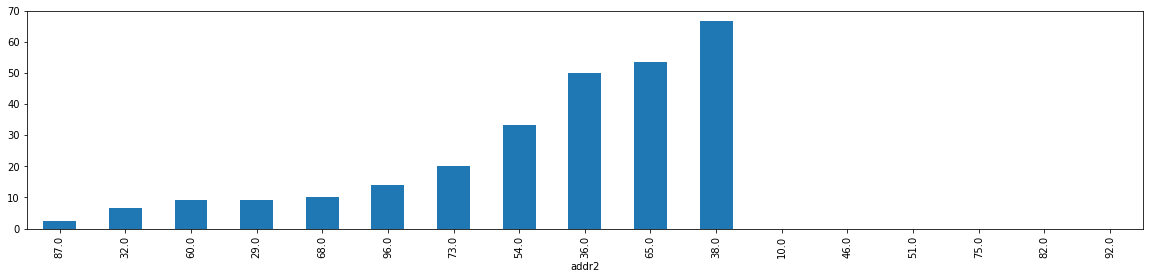

In [266]:
A=pd.DataFrame(TRAIN_T_D_FRAUD_DATA[TRAIN_T_D_FRAUD_DATA['addr2']!=0.0].groupby('addr2').size())
B=pd.DataFrame(TRAIN_T_D_NON_FRAUD_DATA[TRAIN_T_D_NON_FRAUD_DATA['addr2']!=0.0].groupby('addr2').size())

A.columns=['Fraud']
A['Non Fraud']= pd.DataFrame(B)

A['percent']= A['Fraud']*100/(A['Fraud'] + A['Non Fraud'])
A['percent'].sort_values().plot.bar(figsize=(20,4))
A.sort_values(by='percent').tail(7)


### 66% transactions with addr2 are fraudulent

,Fraud,Non Fraud,percent
dist1,,,
2530.0,1,NaN,NaN
2569.0,1,NaN,NaN
2630.0,1,NaN,NaN
2720.0,1,NaN,NaN
3177.0,1,NaN,NaN
3654.0,3,NaN,NaN
4942.0,2,NaN,NaN


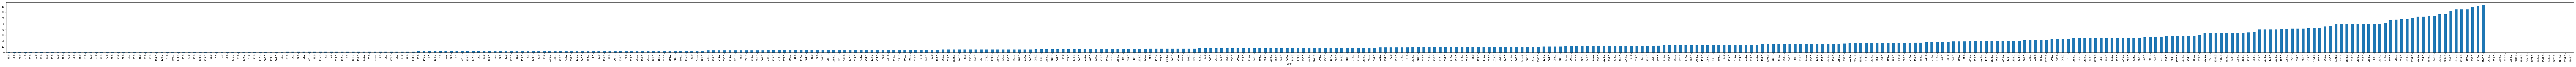

In [270]:
A=pd.DataFrame(TRAIN_T_D_FRAUD_DATA[TRAIN_T_D_FRAUD_DATA['dist1']!=-1.0].groupby('dist1').size())
B=pd.DataFrame(TRAIN_T_D_NON_FRAUD_DATA[TRAIN_T_D_NON_FRAUD_DATA['dist1']!=-1.0].groupby('dist1').size())
A.columns=['Fraud']

A['Non Fraud']= pd.DataFrame(B)

A['percent']= A['Fraud']*100/(A['Fraud'] + A['Non Fraud'])
A['percent'].sort_values().plot.bar(figsize=(200,4))
A.sort_values(by='percent').tail(7)


### 70+ % transactions through with dist 1 as '2148' are fraudulent

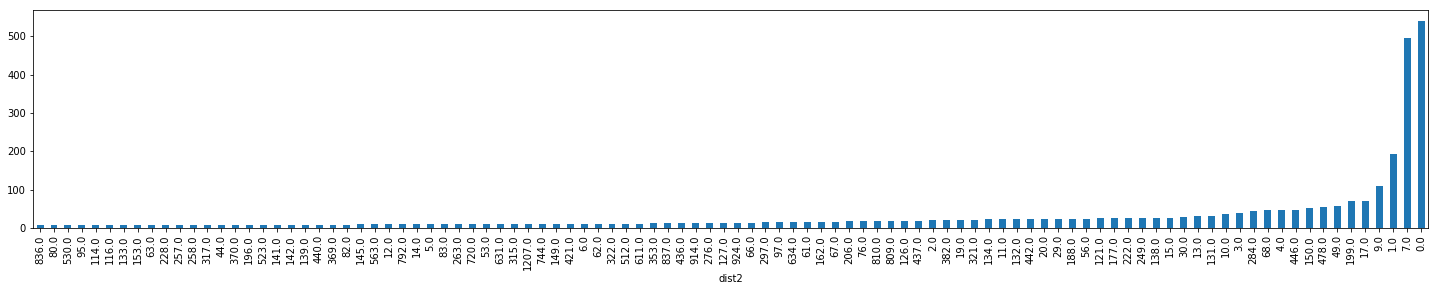

In [54]:
TRAIN_T_D_FRAUD_DATA[TRAIN_T_D_FRAUD_DATA['dist2']!=-1.0].groupby('dist2').size().sort_values().tail(100).plot.bar(figsize=(25,4))

In [0]:
A=pd.DataFrame(TRAIN_T_D_NON_FRAUD_DATA[TRAIN_T_D_NON_FRAUD_DATA['dist2']!=-1.0].groupby('dist2').size())
B=pd.DataFrame(TRAIN_T_D_FRAUD_DATA[TRAIN_T_D_FRAUD_DATA['dist2']!=-1.0].groupby('dist2').size())
A.columns=['Non Fraud']
A['Fraud']= pd.DataFrame(B)

A['percent']= A['Fraud']*100/(A['Fraud'] + A['Non Fraud'])




In [293]:
TRAIN_T_D_FRAUD_DATA.groupby('dist2').size().head(200).tail(25)

dist2
293.0     5
295.0     1
297.0    15
313.0     1
315.0     9
317.0     7
321.0    21
322.0    10
333.0     1
339.0     3
342.0     3
343.0     2
348.0     4
351.0     1
353.0    12
354.0     1
355.0     1
361.0     2
367.0     1
369.0     8
370.0     7
371.0     5
377.0     2
382.0    21
384.0     1
dtype: int64

,Non Fraud,Fraud,percent
dist2,,,
249.0,7,26.0,78.787879
1176.0,1,4.0,80.000000
2018.0,1,4.0,80.000000
1459.0,1,5.0,83.333333
382.0,1,21.0,95.454545


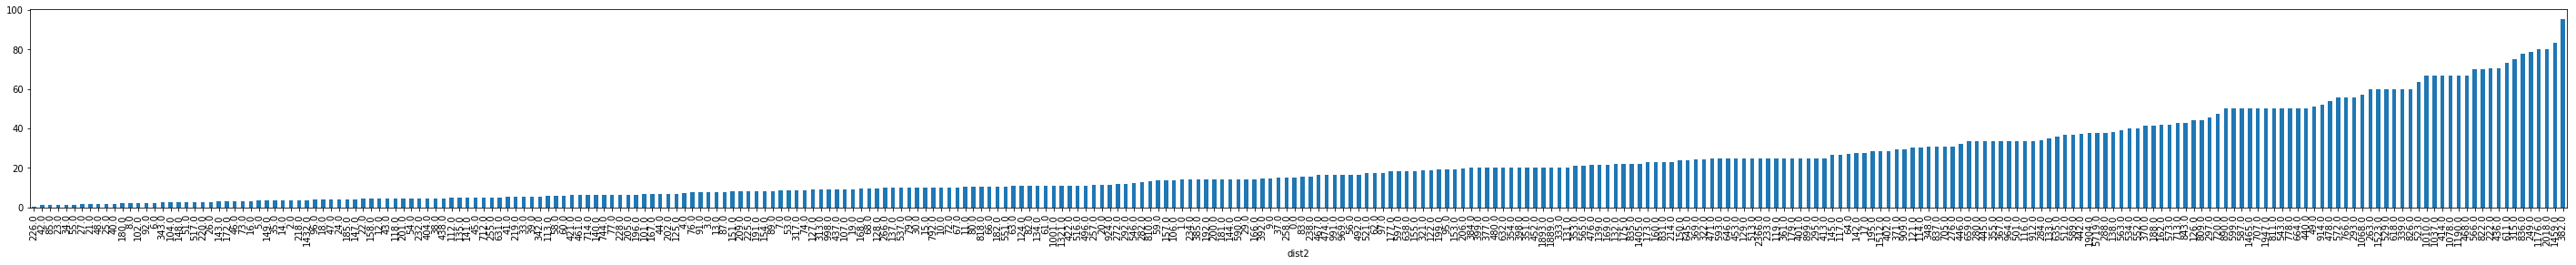

In [284]:
A.dropna(subset=['percent'], inplace=True)
A['percent'].sort_values().plot.bar(figsize=(50,4))

A.sort_values(by='percent').tail(5)

## 95% of the transactions reported for 382 dist2 are fraud

## Part 2 - Transaction Frequency

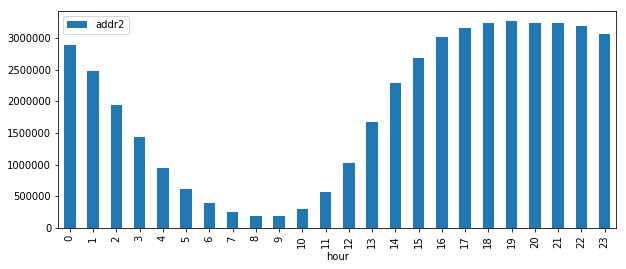

In [101]:
TRAIN_TRANSACTION_TRANSACTIONDT_ADDR2 = TRAIN_TRANSACTION_DATA_SKIENA[['hour', 'addr2']]
COUNT_OF_ADDR2=pd.DataFrame(TRAIN_TRANSACTION_TRANSACTIONDT_ADDR2.groupby('addr2').size())
COUNT_OF_ADDR2.columns=['Count']
COUNT_OF_ADDR2.sort_values(by='Count').tail(1)
TRAIN_TRANSACTION_TRANSACTIONDT_ADDR2_MAX_FREQ_EIGHTY_SEVEN_HOUR_CRITERIA = TRAIN_TRANSACTION_TRANSACTIONDT_ADDR2.loc[TRAIN_TRANSACTION_TRANSACTIONDT_ADDR2['addr2']==87.0]
TRAIN_TRANSACTION_TRANSACTIONDT_ADDR2_MAX_FREQ_EIGHTY_SEVEN_HOUR_CRITERIA.groupby('hour').sum().plot.bar(figsize=(10,4))

* ### The highest data is for addr2 which is most probably a country code. This data was discussed and heavily supported in kaggle's discussion threads. https://www.kaggle.com/c/ieee-fraud-detection/discussion/102910#latest-595293

* ### The article discusses the waking time of an average american  https://whygetupearly.com/whats-the-average-bedtime-for-adults/

* ### The average american wakes up at 6:30am and sleeps at 11:30pm. Roughly estimating these two to be from 5 to 12, the waking hours relative to this data is 0 to 5 and 12 to 23.



## Part 3 - Product Code

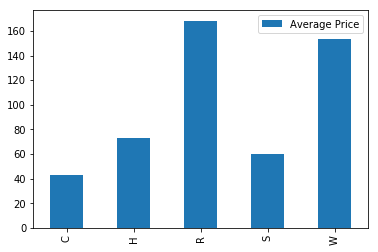

In [65]:
W_COST = TRAIN_TRANSACTION_DATA_SKIENA.loc[TRAIN_TRANSACTION_DATA_SKIENA['W']==1]
C_COST = TRAIN_TRANSACTION_DATA_SKIENA.loc[TRAIN_TRANSACTION_DATA_SKIENA['C']==1]
H_COST = TRAIN_TRANSACTION_DATA_SKIENA.loc[TRAIN_TRANSACTION_DATA_SKIENA['H']==1]
R_COST = TRAIN_TRANSACTION_DATA_SKIENA.loc[TRAIN_TRANSACTION_DATA_SKIENA['R']==1]
S_COST = TRAIN_TRANSACTION_DATA_SKIENA.loc[TRAIN_TRANSACTION_DATA_SKIENA['S']==1]
MeanH=H_COST['TransactionAmt'].sum()/H_COST.shape[0]
MeanW=W_COST['TransactionAmt'].sum()/W_COST.shape[0]
MeanC=C_COST['TransactionAmt'].sum()/C_COST.shape[0]
MeanR=R_COST['TransactionAmt'].sum()/R_COST.shape[0]
MeanS=S_COST['TransactionAmt'].sum()/S_COST.shape[0]
cost = {'H':MeanH,'W':MeanW,'C':MeanC,'R':MeanR,'S':MeanS}
COST = pd.DataFrame({'Average Price': cost})
COST.plot.bar()


* ### Product type R seems expensive at around 168 avg cost per unit.
* ### Product type C seems cheapest at around 40 avg cost per unit.
* ### The above graph shows average price of each product type.
* ### It is calculated using mean. (Total Transaction AMT in ProductCD)/(All respective ProductCD transactions)

## Part 4 - Correlation Coefficient

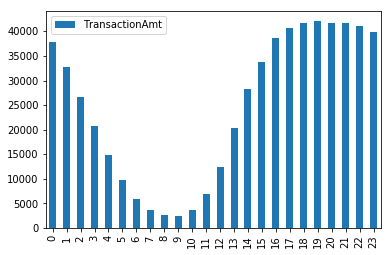

In [68]:
TOD_AND_AMT = TRAIN_TRANSACTION_DATA_SKIENA[['TransactionAmt','hour']].groupby('hour').size()
TOD_AND_AMT=pd.DataFrame(TOD_AND_AMT)
TOD_AND_AMT.columns=['Amt']
TOD_AND_AMT['hour']=pd.DataFrame(TRAIN_TRANSACTION_DATA_SKIENA['hour'].unique())
TOD=pd.DataFrame()
TOD['Amt']=TOD_AND_AMT['Amt']
TOD['Time']=TOD_AND_AMT['hour']
TOD=pd.DataFrame()
TOD=pd.DataFrame(np.array(TRAIN_TRANSACTION_DATA_SKIENA[['TransactionAmt','hour']].groupby('hour').size()))
pd.DataFrame(np.array(TRAIN_TRANSACTION_DATA_SKIENA[['TransactionAmt','hour']].groupby('hour').size()))
TOD.columns = ['TransactionAmt']
TOD.plot.bar()


In [64]:
TRAIN_TRANSACTION_DATA_SKIENA.corr()

,TransactionID,TransactionAmt,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,DeviceInfo,isFraud,hour,C,H,R,S,W,american express,discover,mastercard,visa,charge card,credit,debit,debit or credit,desktop,mobile
TransactionID,1.000000,0.012025,0.015285,0.088160,-0.005017,-0.001855,0.005670,-0.027466,0.066017,0.014166,0.011143,-0.008696,-0.170191,-0.120515,0.013181,0.159403,-0.058901,-0.010789,0.021545,-0.008009,-0.003180,-0.085406,0.080943,-0.002566,-0.130888,-0.062545
TransactionAmt,0.012025,1.000000,-0.013181,0.058434,0.088535,0.138022,0.022934,-0.027575,0.075637,0.011320,0.044532,-0.139600,-0.062948,0.036336,-0.044301,0.129420,0.019018,0.058336,-0.007578,-0.010665,-0.001591,0.133600,-0.133598,-0.000923,-0.072824,-0.088364
P_emaildomain,0.015285,-0.013181,1.000000,0.286664,0.076013,0.116611,0.014883,-0.031981,0.085509,-0.024056,-0.001973,-0.118461,-0.047909,-0.108924,0.062906,0.153244,-0.061991,0.002476,0.007615,0.007319,0.001607,-0.090122,0.089796,-0.003394,-0.121292,-0.067994
R_emaildomain,0.088160,0.058434,0.286664,1.000000,0.252682,0.385129,0.066599,-0.126005,0.306556,-0.085760,0.014322,-0.390946,-0.131891,-0.352287,-0.062281,0.573873,-0.183317,-0.004431,0.026854,0.019229,0.001469,-0.214080,0.212316,0.002396,-0.426603,-0.285654
addr1,-0.005017,0.088535,0.076013,0.252682,1.000000,0.686815,0.045157,-0.116555,0.240398,-0.106814,0.044692,-0.665220,0.065225,0.068293,0.051054,0.399576,0.029235,0.021937,-0.061151,0.048108,-0.004270,-0.080808,0.080997,-0.005095,-0.205462,-0.286094
addr2,-0.001855,0.138022,0.116611,0.385129,0.686815,1.000000,0.070498,-0.176882,0.362016,-0.161030,0.068837,-0.980583,0.082148,0.093755,0.042913,0.610559,0.042338,0.038281,-0.061860,0.041762,-0.009856,-0.121353,0.121127,0.002563,-0.324809,-0.420950
dist1,0.005670,0.022934,0.014883,0.066599,0.045157,0.070498,1.000000,-0.020250,0.060156,-0.006110,0.013012,-0.071775,-0.048217,-0.051734,-0.028077,0.116051,-0.023694,-0.000578,-0.011432,0.017892,-0.000998,-0.038128,0.038777,-0.000487,-0.081327,-0.063898
dist2,-0.027466,-0.027575,-0.031981,-0.126005,-0.116555,-0.176882,-0.020250,1.000000,-0.083646,0.028497,-0.013003,0.182953,-0.013050,0.049604,0.060337,-0.174496,0.027108,-0.002168,-0.001411,-0.004330,0.013652,0.055340,-0.054728,-0.000729,0.149001,0.086958
DeviceInfo,0.066017,0.075637,0.085509,0.306556,0.240398,0.362016,0.060156,-0.083646,1.000000,-0.075975,0.043407,-0.356720,-0.223015,-0.201364,-0.081754,0.518354,-0.113827,-0.007695,0.009776,0.019555,-0.001129,-0.162482,0.161062,0.002164,-0.325876,-0.399630
isFraud,0.014166,0.011320,-0.024056,-0.085760,-0.106814,-0.161030,-0.006110,0.028497,-0.075975,1.000000,-0.013112,0.161442,0.016784,0.004030,0.018515,-0.135549,-0.004095,0.024564,-0.002463,-0.001741,-0.000960,0.100508,-0.099779,-0.001357,0.067522,0.117027


* ### Transaction Amt shows similar pattern to the activity and hence complements each other.

* ### When people are awake they make more purchases.

* ### The correlation below transactionamt and hour is 0.04

## Part 5 - Interesting Plot

In [97]:
W_ANALYSIS=TRAIN_TRANSACTION_DATA_SKIENA.loc[TRAIN_TRANSACTION_DATA_SKIENA['W']==1]
NON_W_ANALYSIS=TRAIN_TRANSACTION_DATA_SKIENA.loc[TRAIN_TRANSACTION_DATA_SKIENA['W']!=1]
W_ANALYSIS.loc[W_ANALYSIS['dist2']!=-1].sum().sum()


0.0

In [98]:
NON_W_ANALYSIS.loc[NON_W_ANALYSIS['dist1']!=-1].sum().sum()

0.0

* #### The above analysis shows that there is no data in dist2 for Product code : 'W'

* #### The above analysis also shows that there is no data in dist1 for Product code : 'H','C','R','S'

* #### There is a school of thought (https://www.kaggle.com/c/ieee-fraud-detection/discussion/107791) that puts 'ProductCD' as a type of transaction.

* ### If that were true, and give the high percent for ProductCD 'W', it is probably the mode of online payment using 'Web' and hence the high number.

In [0]:
plt.subplots(figsize=(20,10))
FRAUD_P=pd.DataFrame(TRAIN_T_D_FRAUD_DATA.groupby('P_emaildomain').size())


In [0]:
plt.subplots(figsize=(20,10))
NON_FRAUD_P=pd.DataFrame(TRAIN_T_D_NON_FRAUD_DATA.groupby('P_emaildomain').size())

In [0]:
FRAUD_P['NON FRAUD'] = pd.DataFrame(TRAIN_T_D_NON_FRAUD_DATA.groupby('P_emaildomain').size())

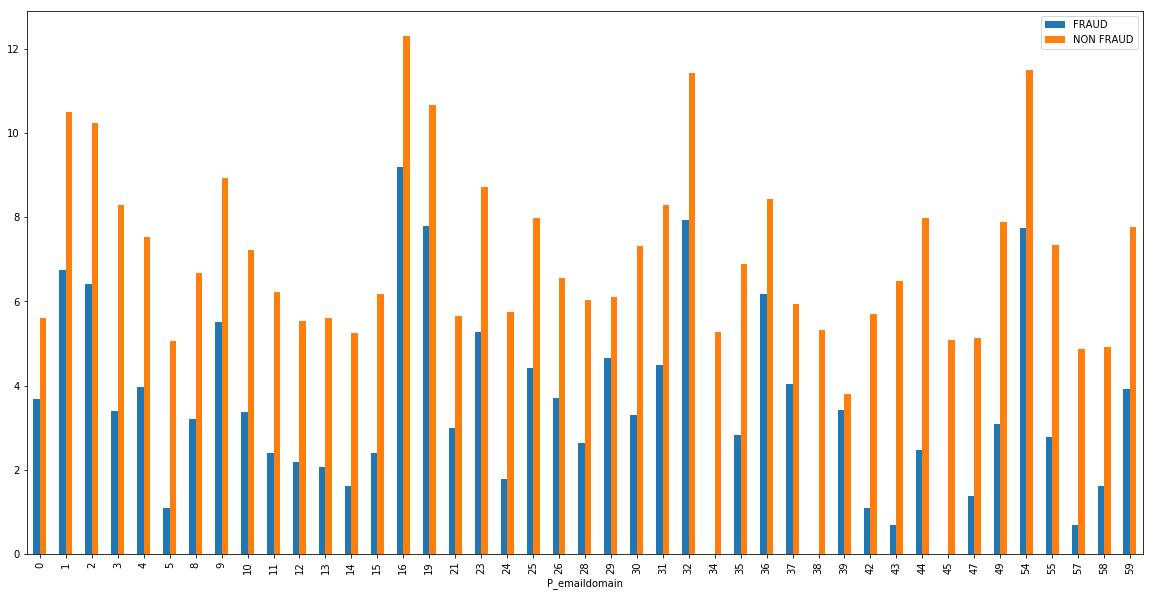

In [137]:
np.log(FRAUD_P).plot.bar(figsize=(20,10))

In [0]:
FRAUD_P['ratio']=FRAUD_P['FRAUD']/FRAUD_P['NON FRAUD']

In [0]:
FRAUD_P['percent']=FRAUD_P['FRAUD']* 100/(FRAUD_P['NON FRAUD']+FRAUD_P['FRAUD'])

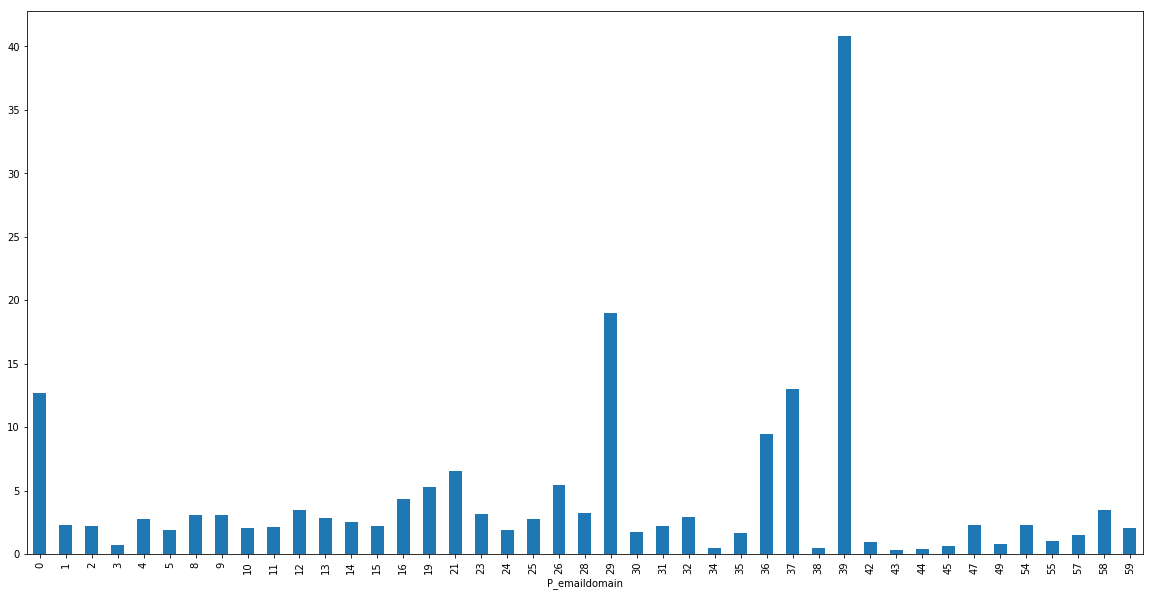

In [161]:
FRAUD_P['percent'].plot.bar(figsize=(20,10))

In [163]:
le_p.inverse_transform([39,29,0,37])

array(['protonmail.com', 'mail.com', 'aim.com', 'outlook.es'],
      dtype=object)

In [158]:
TRAIN_TRANSACTION_DATA_SKIENA[TRAIN_TRANSACTION_DATA_SKIENA['P_emaildomain']==39].groupby('isFraud').size()

isFraud
0    45
1    31
dtype: int64

* ### Another insight that one can find by analysing the P_emaildomain or Purchaser's email domain is that there is one email domain which stands out "protonmail"

* ### 40% transactions made by protonmail are fraudulent.

* ### There are 31 fraudulent transaction of protonmail and 45 non fraudulent. 

* ### Following closely are 'mail.com', 'aim.com' and 'outlook.es'



## Part 6 - Prediction Model

In [0]:
TRAIN = TRAIN_TRANSACTION_DATA_SKIENA.copy(deep=False)
TRAIN['R_emaildomain'] = le_r.inverse_transform(TRAIN['R_emaildomain'])
TRAIN['P_emaildomain'] = le_p.inverse_transform(TRAIN['P_emaildomain'])
TRAIN['R_emaildomain']='R_'+TRAIN['R_emaildomain'].astype(str)
TRAIN['P_emaildomain']='P_'+TRAIN['P_emaildomain'].astype(str)
Onehot=pd.DataFrame(pd.get_dummies(TRAIN['R_emaildomain']))
TRAIN=TRAIN.join(Onehot)
Onehot=pd.DataFrame(pd.get_dummies(TRAIN['P_emaildomain']))
TRAIN=TRAIN.join(Onehot)




TRAIN.drop(columns=['R_emaildomain','P_emaildomain'], inplace=True)



### Load data

import pandas as pd
TEST_TRANSACTION_DATA = pd.read_csv('test_transaction.csv')
TEST_IDENTITY_DATA = pd.read_csv('test_identity.csv')



TEST_TRANSACTION_DATA_FINAL = pd.merge(pd.DataFrame(TEST_TRANSACTION_DATA),pd.DataFrame(TEST_IDENTITY_DATA), how='left', on = 'TransactionID')

#Extracting only for skiena's columns
Skiena_Columns= ['TransactionID','TransactionDT','TransactionAmt','ProductCD','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2','DeviceType','DeviceInfo']
TEST_TRANSACTION_DATA_SKIENA=TEST_TRANSACTION_DATA_FINAL[Skiena_Columns]

##Drop DeviceInfo

TEST_TRANSACTION_DATA_SKIENA.drop(columns=['DeviceInfo'], inplace=True)




#Cleaning 
TEST_TRANSACTION_DATA_SKIENA['R_emaildomain']='R_'+TEST_TRANSACTION_DATA_SKIENA['R_emaildomain'].astype(str)
TEST_TRANSACTION_DATA_SKIENA['P_emaildomain']='P_'+TEST_TRANSACTION_DATA_SKIENA['P_emaildomain'].astype(str)
TEST_TRANSACTION_DATA_SKIENA['dist2'].fillna(-1.0,inplace=True)
TEST_TRANSACTION_DATA_SKIENA['dist1'].fillna(-1.0,inplace=True)
TEST_TRANSACTION_DATA_SKIENA['addr2'].fillna(0.0,inplace=True)
TEST_TRANSACTION_DATA_SKIENA['addr1'].fillna(0.0,inplace=True)

#Onehot encoding

Onehot=pd.DataFrame(pd.get_dummies(TEST_TRANSACTION_DATA_SKIENA['R_emaildomain']))
TEST_TRANSACTION_DATA_SKIENA=TEST_TRANSACTION_DATA_SKIENA.join(Onehot)
Onehot=pd.DataFrame(pd.get_dummies(TEST_TRANSACTION_DATA_SKIENA['P_emaildomain']))
TEST_TRANSACTION_DATA_SKIENA=TEST_TRANSACTION_DATA_SKIENA.join(Onehot)
Onehot=pd.DataFrame(pd.get_dummies(TEST_TRANSACTION_DATA_SKIENA['ProductCD']))
TEST_TRANSACTION_DATA_SKIENA=TEST_TRANSACTION_DATA_SKIENA.join(Onehot)
Onehot=pd.DataFrame(pd.get_dummies(TEST_TRANSACTION_DATA_SKIENA['card4']))
TEST_TRANSACTION_DATA_SKIENA=TEST_TRANSACTION_DATA_SKIENA.join(Onehot)
Onehot=pd.DataFrame(pd.get_dummies(TEST_TRANSACTION_DATA_SKIENA['card6']))
TEST_TRANSACTION_DATA_SKIENA=TEST_TRANSACTION_DATA_SKIENA.join(Onehot)
Onehot=pd.DataFrame(pd.get_dummies(TEST_TRANSACTION_DATA_SKIENA['DeviceType']))
TEST_TRANSACTION_DATA_SKIENA=TEST_TRANSACTION_DATA_SKIENA.join(Onehot)


#Drop one hot encoded columns

TEST_TRANSACTION_DATA_SKIENA.drop(columns=['card4','card6','ProductCD','R_emaildomain','P_emaildomain','DeviceType'],inplace=True)

#Cleaning transactiondt

Onehot_hour=pd.DataFrame(pd.to_datetime(TEST_TRANSACTION_DATA_SKIENA['TransactionDT'],unit='s').dt.hour)

Onehot_hour.columns=['hour']

TEST_TRANSACTION_DATA_SKIENA['hour']=pd.DataFrame(Onehot_hour)

TEST_TRANSACTION_DATA_SKIENA.drop(columns=['TransactionDT'],inplace=True)

#### TEST DATA SETUP END ##################




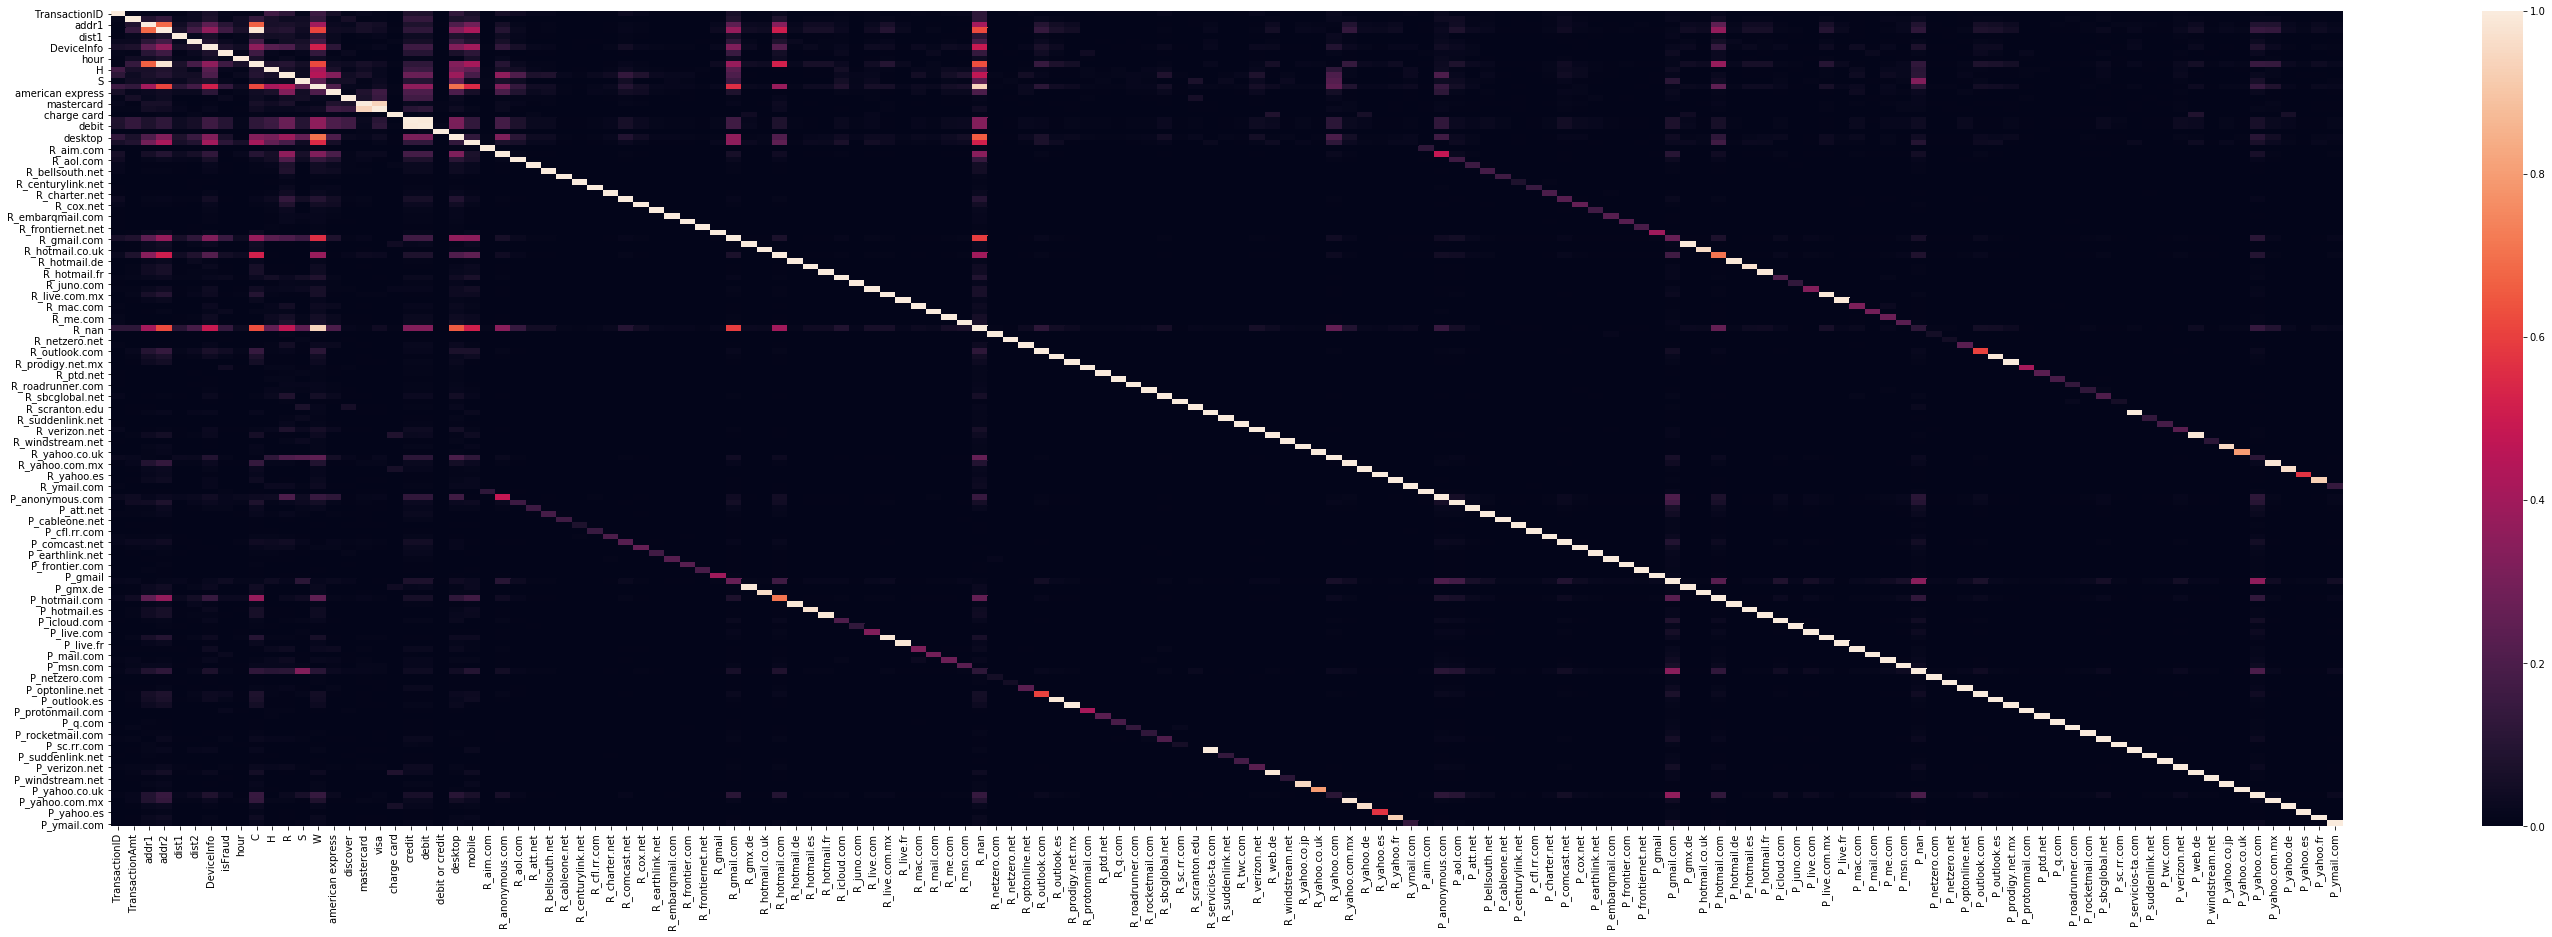

In [79]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(50,15))
import seaborn as sns
sns.heatmap(np.abs(TRAIN.corr()))

### The above heatmap shows that all columns are not required. Hence, only few columns with correlation greater  > 0.4 absolute value


### Two models are trained below to predict. Logistic and Linear Regression

In [80]:

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

COLS=['mobile','desktop','credit','debit','W','R','H','C',
      'P_yahoo.com','P_hotmail.com','P_gmail.com'
      ,'R_yahoo.com','R_hotmail.com','R_gmail.com',
      'addr1','addr2','dist1','dist2']
X=TRAIN[COLS]
Y=TRAIN_TRANSACTION_DATA_SKIENA['isFraud']

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.3)

clf = LogisticRegression(solver='lbfgs')
clf.fit(X_TRAIN, Y_TRAIN)

PREDS = clf.predict(X_TEST)

print(metrics.classification_report(Y_TEST, PREDS))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98    171044
           1       0.00      0.00      0.00      6118

    accuracy                           0.97    177162
   macro avg       0.48      0.50      0.49    177162
weighted avg       0.93      0.97      0.95    177162



Write your answer here

In [81]:
reg = LinearRegression().fit(X_TRAIN, Y_TRAIN)
import numpy as np;
y_pred = reg.predict(X_TEST)

mae = metrics.mean_absolute_error(Y_TEST, y_pred)
msq = metrics.mean_squared_error(Y_TEST, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(Y_TEST, y_pred))

print('Mean Absolute Error:'+str(mae))
print('Mean Squared Error:'+str(msq))
print('Root Mean Squared Error:'+str(rmse))




Mean Absolute Error:0.06468942445833634
Mean Squared Error:0.03186813942038352
Root Mean Squared Error:0.17851649621360913


In [0]:

SAMPLE_SUBMISSION = pd.read_csv('sample_submission.csv')
TRANSACTIONIDS_JOIN = pd.merge(pd.DataFrame(SAMPLE_SUBMISSION),pd.DataFrame(TEST_TRANSACTION_DATA_SKIENA), how='left', on = 'TransactionID')
TRANSACTIONIDS_JOIN=TRANSACTIONIDS_JOIN[COLS]

FRAUD_COLUMN_LOG=clf.predict(TRANSACTIONIDS_JOIN)
FRAUD_COLUMN_LIN= reg.predict(TRANSACTIONIDS_JOIN)
KAGGLE_UPLOAD_LOG=pd.DataFrame()
KAGGLE_UPLOAD_LIN=pd.DataFrame()
KAGGLE_UPLOAD_LOG['TransactionID']=SAMPLE_SUBMISSION['TransactionID']
KAGGLE_UPLOAD_LIN['TransactionID']=SAMPLE_SUBMISSION['TransactionID']
FRAUD_COLUMN_LOG= pd.DataFrame(FRAUD_COLUMN_LOG)
FRAUD_COLUMN_LIN= pd.DataFrame(FRAUD_COLUMN_LIN)
FRAUD_COLUMN_LOG.columns=['isFraud']
FRAUD_COLUMN_LIN.columns=['isFraud']
KAGGLE_UPLOAD_LOG['isFraud']=pd.DataFrame(FRAUD_COLUMN_LOG['isFraud'])
KAGGLE_UPLOAD_LIN['isFraud']=pd.DataFrame(FRAUD_COLUMN_LIN['isFraud'])

KAGGLE_UPLOAD_LIN.to_csv("LinearRegression.csv")
KAGGLE_UPLOAD_LIN.to_csv("LogisticRegression.csv")

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/abdullahmitkar

Highest Rank: 5343

Score: 0.8057

Number of entries: 4

INCLUDE IMAGE OF YOUR KAGGLE RANKING

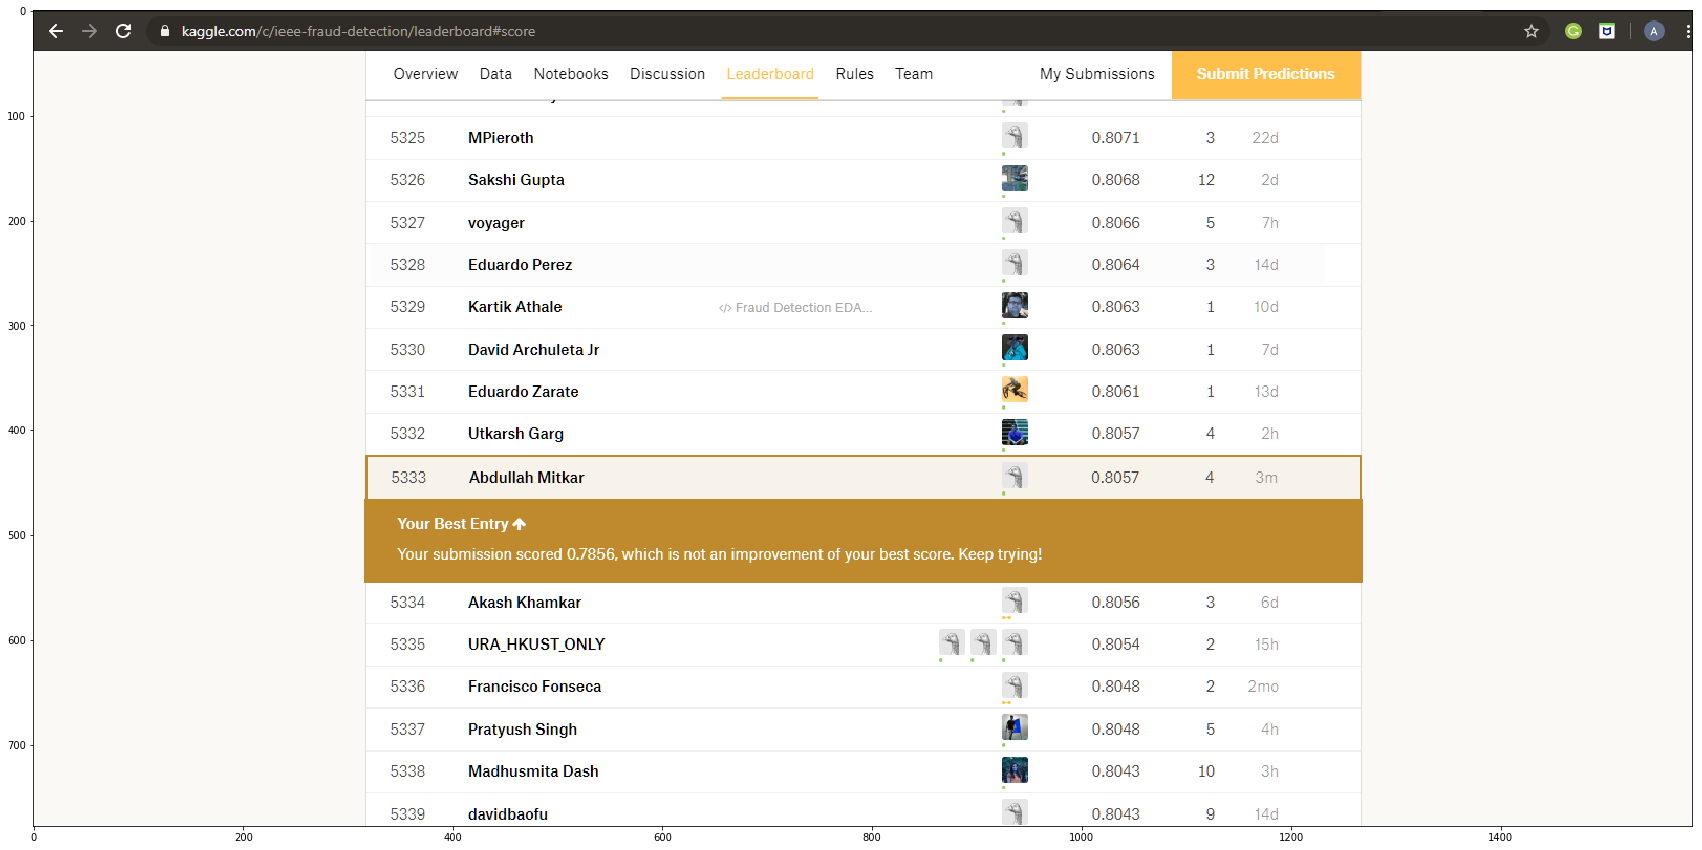

In [87]:
import cv2
plt.subplots(figsize=(50,15))
img=cv2.imread('Capture_Kaggle.PNG')
plt.imshow(img)